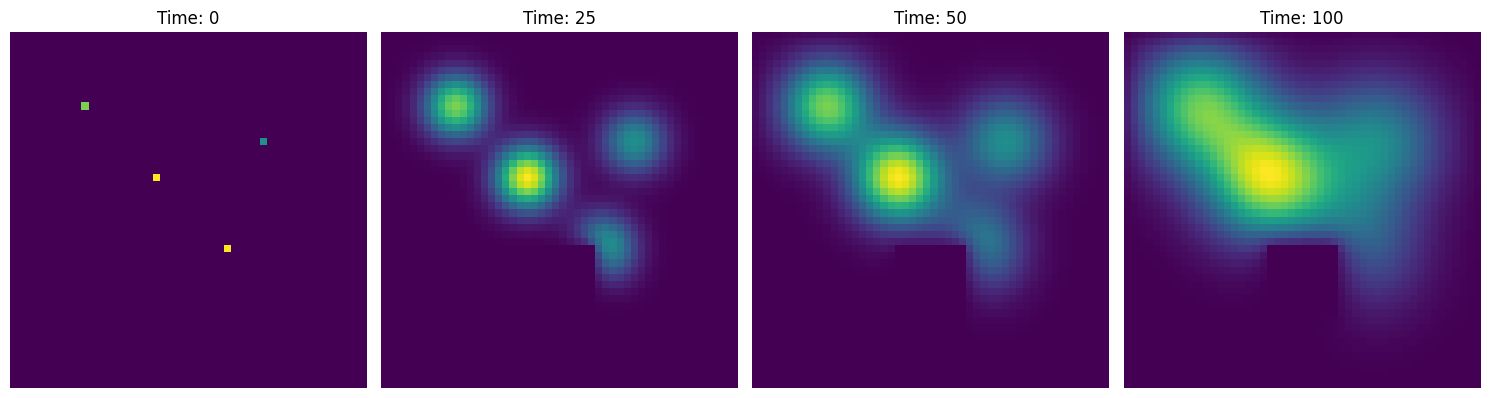

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def difusion_automata(M, N, T, u0, K, mask=None):
    u = np.copy(u0)
    historial = [u.copy()]

    def obtener_vecinos(i, j):
        vecinos = [(i-1, j), (i+1, j), (i, j-1), (i, j+1), 
                   (i-1, j-1), (i-1, j+1), (i+1, j-1), (i+1, j+1)]
        # Retornar solo los vecinos válidos dentro del grid
        return [(x, y) for x, y in vecinos if 0 <= x < M and 0 <= y < N]
    
    for t in range(T):
        nuevo_u = np.copy(u)
        for i in range(M):
            for j in range(N):
                if mask is None or mask[i, j]:  # Si hay máscara, solo actualizamos en las celdas válidas
                    suma_vecinos = 0
                    vecinos = obtener_vecinos(i, j)
                    for x, y in vecinos:
                        suma_vecinos += u[x, y]
                    # Actualización según la ecuación de difusión
                    nuevo_u[i, j] = (1 - K) * u[i, j] + K * (suma_vecinos / 8)
        u = nuevo_u
        historial.append(u.copy())
    
    return historial

def graficar_secuencia(historial, tiempos):
    fig, axs = plt.subplots(1, len(tiempos), figsize=(15, 5))
    
    for idx, t in enumerate(tiempos):
        axs[idx].imshow(historial[t], cmap='viridis', interpolation='nearest')
        axs[idx].set_title(f'Time: {t}')
        axs[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

# Parámetros de simulación
M, N = 50, 50  # Tamaño del grid
T = 100        # Tiempo de simulación
K = 0.5        # Parámetro de difusión

# Distribución inicial
u0 = np.zeros((M, N))
u0[20, 20] = 1.0
u0[30, 30] = 1.0
u0[10, 10] = 0.8
u0[15, 35] = 0.5


# Máscara para región L (opcional)
mask = np.ones((M, N), dtype=bool)
mask[30:40, 20:30] = False  # Definir un agujero en forma de L

# Ejecutar simulación
historial = difusion_automata(M, N, T, u0, K, mask)

# Graficar evolución en tiempos específicos
tiempos = [0, 25, 50, 100]  # Momentos de tiempo a graficar
graficar_secuencia(historial, tiempos)
